<a href="https://colab.research.google.com/github/mukulre/Data-Science-Projects/blob/main/E0322052_CNN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow Version: 2.19.0

--- Simulating data... ---
Image data shape (X): (1000, 64, 64, 3)
Labels shape (y): (1000,)


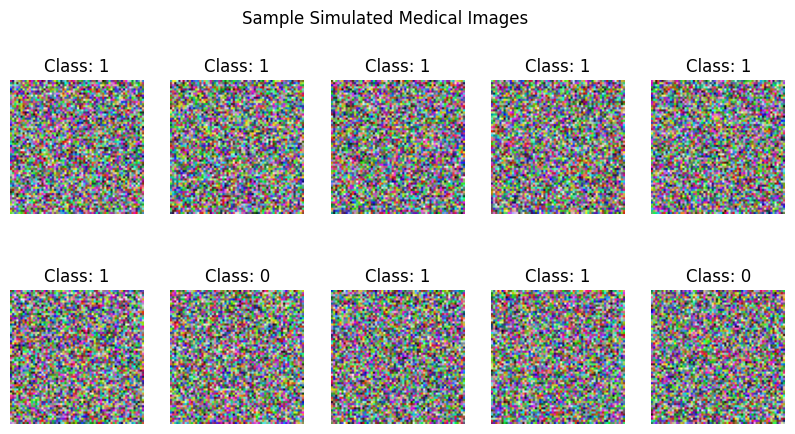


--- Preprocessing data... ---
Training data shape: (800, 64, 64, 3)
Testing data shape: (200, 64, 64, 3)

--- Building the model... ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,402 (3.14 MB)

 Trainable params: 822,402 (3.14 MB)

 Non-trainable params: 0 (0.00 B)


--- Compiling the model... ---

--- Training the model... ---
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.5108 - loss: 0.6935 - val_accuracy: 0.5550 - val_loss: 0.6923
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.5061 - loss: 0.6929 - val_accuracy: 0.5550 - val_loss: 0.6927
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.5130 - loss: 0.6932 - val_accuracy: 0.4450 - val_loss: 0.6937
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.5043 - loss: 0.6930 - val_accuracy: 0.5550 - val_loss: 0.6925
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.4538 - loss: 0.6942 - val_accuracy: 0.5550 - val_loss: 0.6927
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - accuracy: 0.4928 - loss: 0.6931 - val_accuracy: 0.5550 - val_loss: 0.6927
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.5029 - loss: 0.6930 - val_accuracy: 0.5550 - val_loss: 0.6924
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s

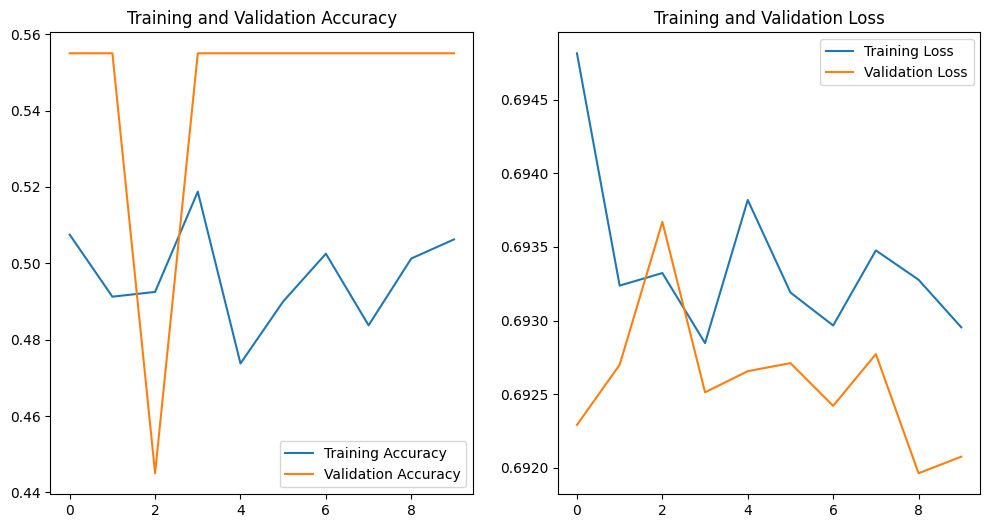

In [2]:
# =====================================================================================
# STEP 1: SETUP AND DATA LOADING
# =====================================================================================
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("TensorFlow Version:", tf.__version__)

# --- Simulating a Medical Image Dataset ---
num_images = 1000
image_size = (64, 64)
num_classes = 2

print("\n--- Simulating data... ---")
X = np.random.rand(num_images, image_size[0], image_size[1], 3).astype('float32')
y = np.random.randint(0, num_classes, num_images)

print(f"Image data shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i])
    plt.title(f"Class: {y[i]}")
    plt.axis('off')
plt.suptitle("Sample Simulated Medical Images")
plt.show()

# =====================================================================================
# STEP 2: DATA PREPROCESSING
# =====================================================================================
print("\n--- Preprocessing data... ---")
X_normalized = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# =====================================================================================
# STEP 3: BUILDING THE CNN MODEL
# =====================================================================================
print("\n--- Building the model... ---")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(64, activation='relu'),

    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

model.summary()

# =====================================================================================
# STEP 4: COMPILING AND TRAINING THE MODEL
# =====================================================================================
print("\n--- Compiling the model... ---")
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Training the model... ---")
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

# =====================================================================================
# STEP 5: EVALUATING THE MODEL WITH CORRECT PLOTTING
# =====================================================================================
print("\n--- Evaluating the model... ---")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Use the length of trained epochs to define x-axis for plotting
epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
